Рубежный контроль №1

Цапий Вадим ИУ5-23М

# 1) Текстовое описание набора данных
В качестве набора данных мы будем использовать набор данных - https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent <br/>
Columns <br/>
id <br/>
cityCidade onde o imóvel está localizada / City where the property is located <br/>
areaArea do imovel / Property area <br/> 
roomsNumero de quartos/ Quantity of rooms <br/>
bathroomNumero de banheiros / Quantity of bathroom <br/>
parking spacesNumero de vagas / Quantity of parking spaces <br/>
floorAndar / Floor <br/>
animalAceita animais? / Acept animals? <br/>
furnitureMobilhada? / Furniture? <br/>
hoaValor do condominio / Homeowners association tax <br/>
rent amountValor do Aluguel / Rent amount <br/>
property taxIPTU / Property tax <br/>
fire insuranceSeguro Incendio / Fire Insurance <br/>
totalValor total / Total <br/>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks", rc={'figure.figsize': (10,10)})

In [3]:
data = pd.read_csv(r"C:\Users\VTsapiy\Downloads\ММО\houses_to_rent_v2.csv")

In [4]:
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


# 2) Основные характеристики датасета

In [5]:
data.shape

(10692, 13)

In [6]:
total_count = data.shape[0]
print("Всего строк {}".format(total_count))

Всего строк 10692


In [7]:
data.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [8]:
data.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                  object
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

In [9]:
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

city - 0
area - 0
rooms - 0
bathroom - 0
parking spaces - 0
floor - 0
animal - 0
furniture - 0
hoa (R$) - 0
rent amount (R$) - 0
property tax (R$) - 0
fire insurance (R$) - 0
total (R$) - 0


Строк соедржащие null не обнаружено

In [10]:
big_area = data.drop(data.loc[data['area'] > 10000].index)
big_area = big_area.drop(big_area.loc[big_area['rent amount (R$)'] > 21000].index)
# Удалим площадь недвижимости более 10000 и стоимость аренды блоее 21000, для удобства и красоты графика

In [11]:
big_area1 = data.drop(data.loc[data['area'] > 1250].index)
big_area1 = big_area.drop(big_area.loc[big_area['rent amount (R$)'] > 16000].index)

# 3) Визуальное исследование датасета

Диаграмма рассеяния

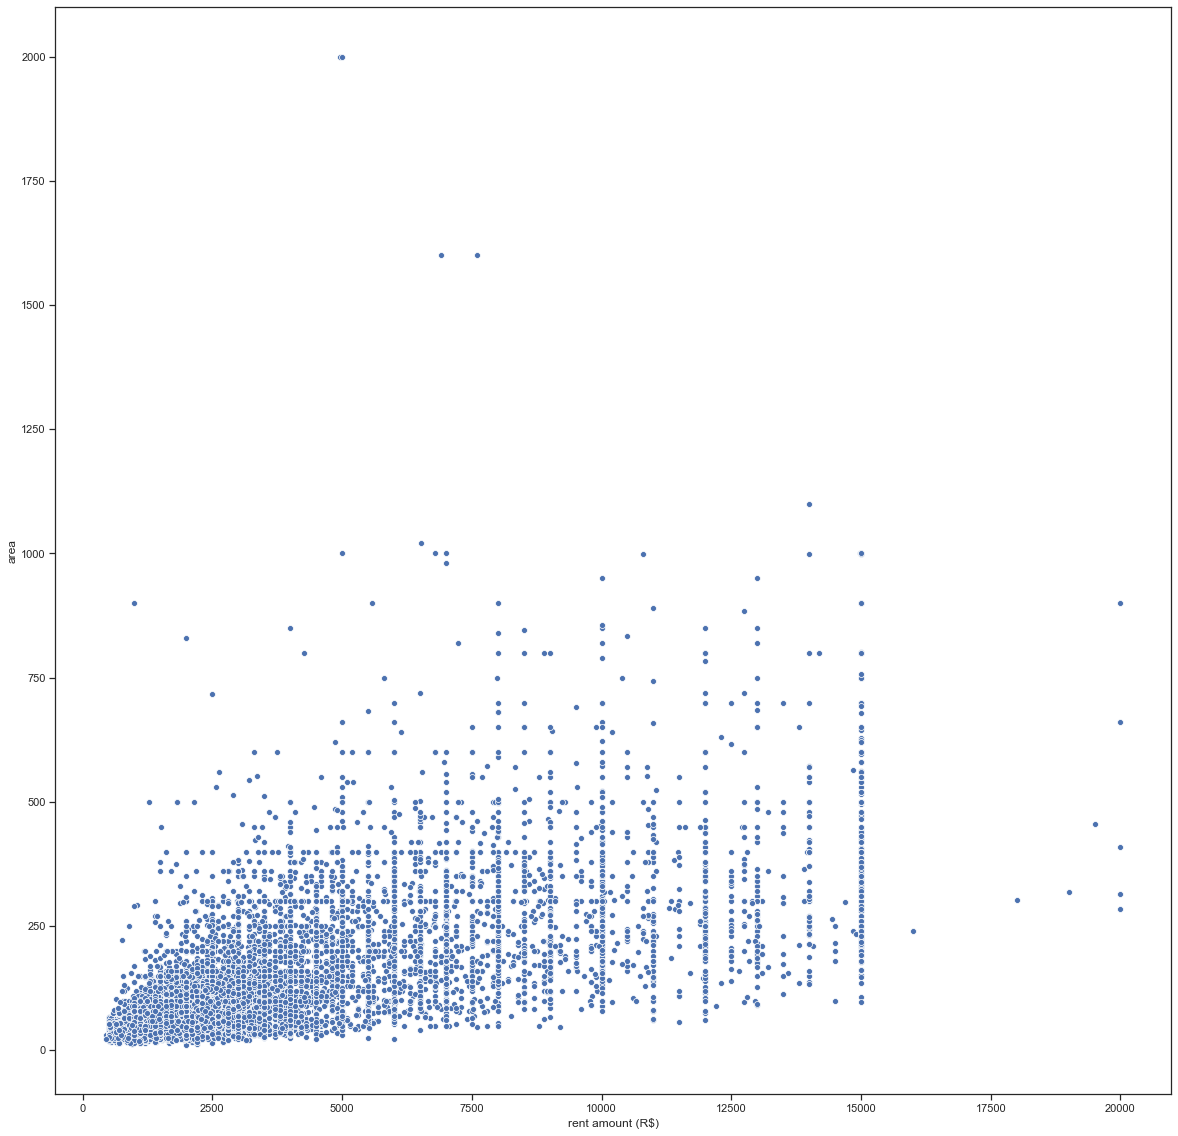

In [12]:
fig, ax = plt.subplots(figsize=(20,20))
sns.scatterplot(ax=ax, x='rent amount (R$)', y='area', data=big_area)

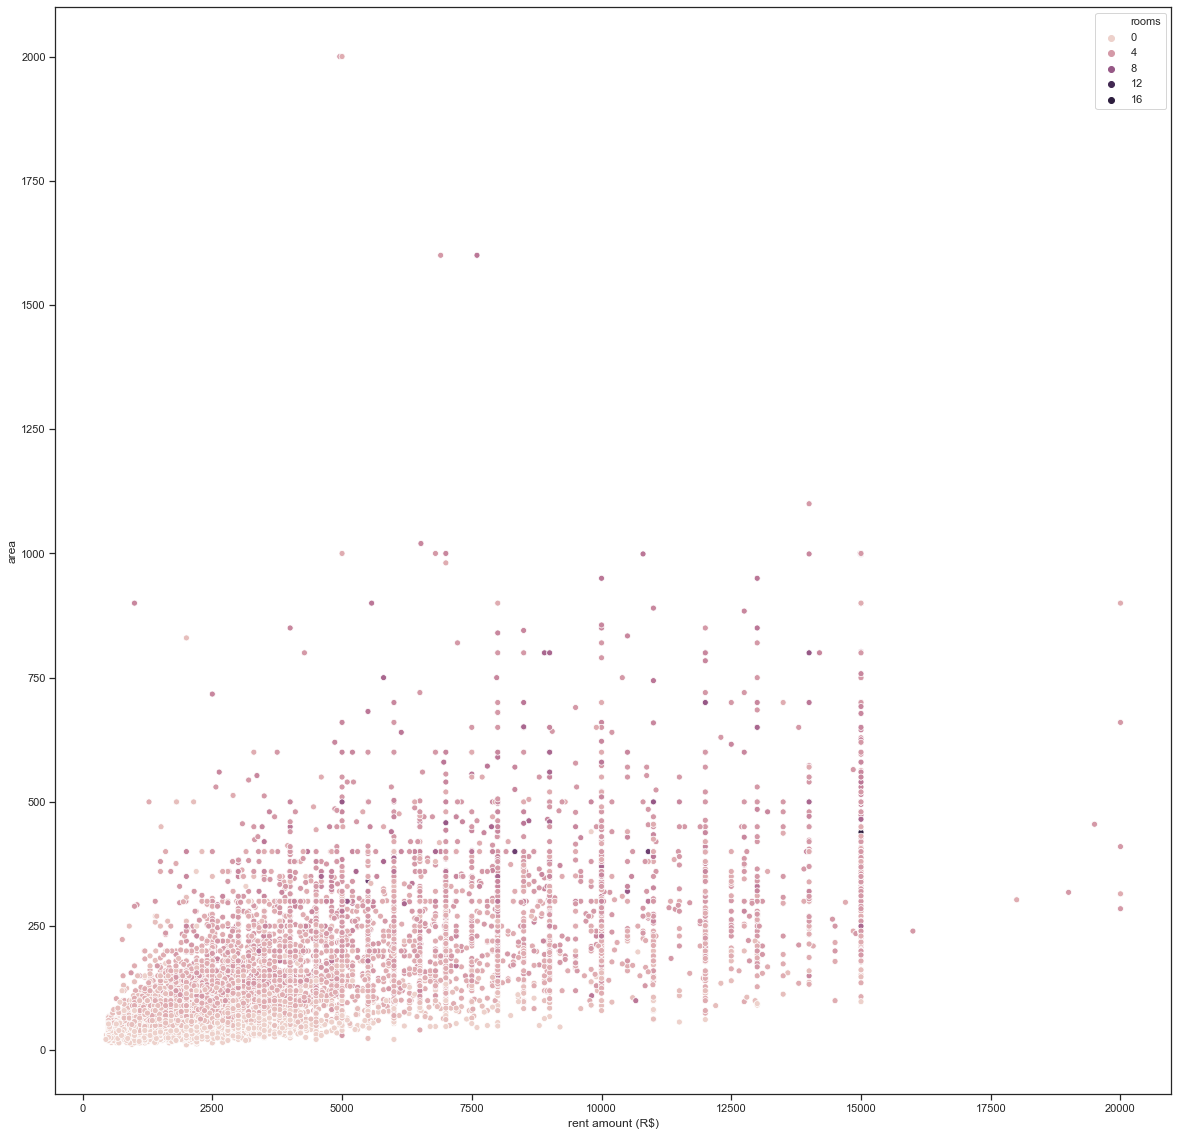

In [13]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.scatterplot(ax=ax, x='rent amount (R$)', y='area', data=big_area, hue='rooms')

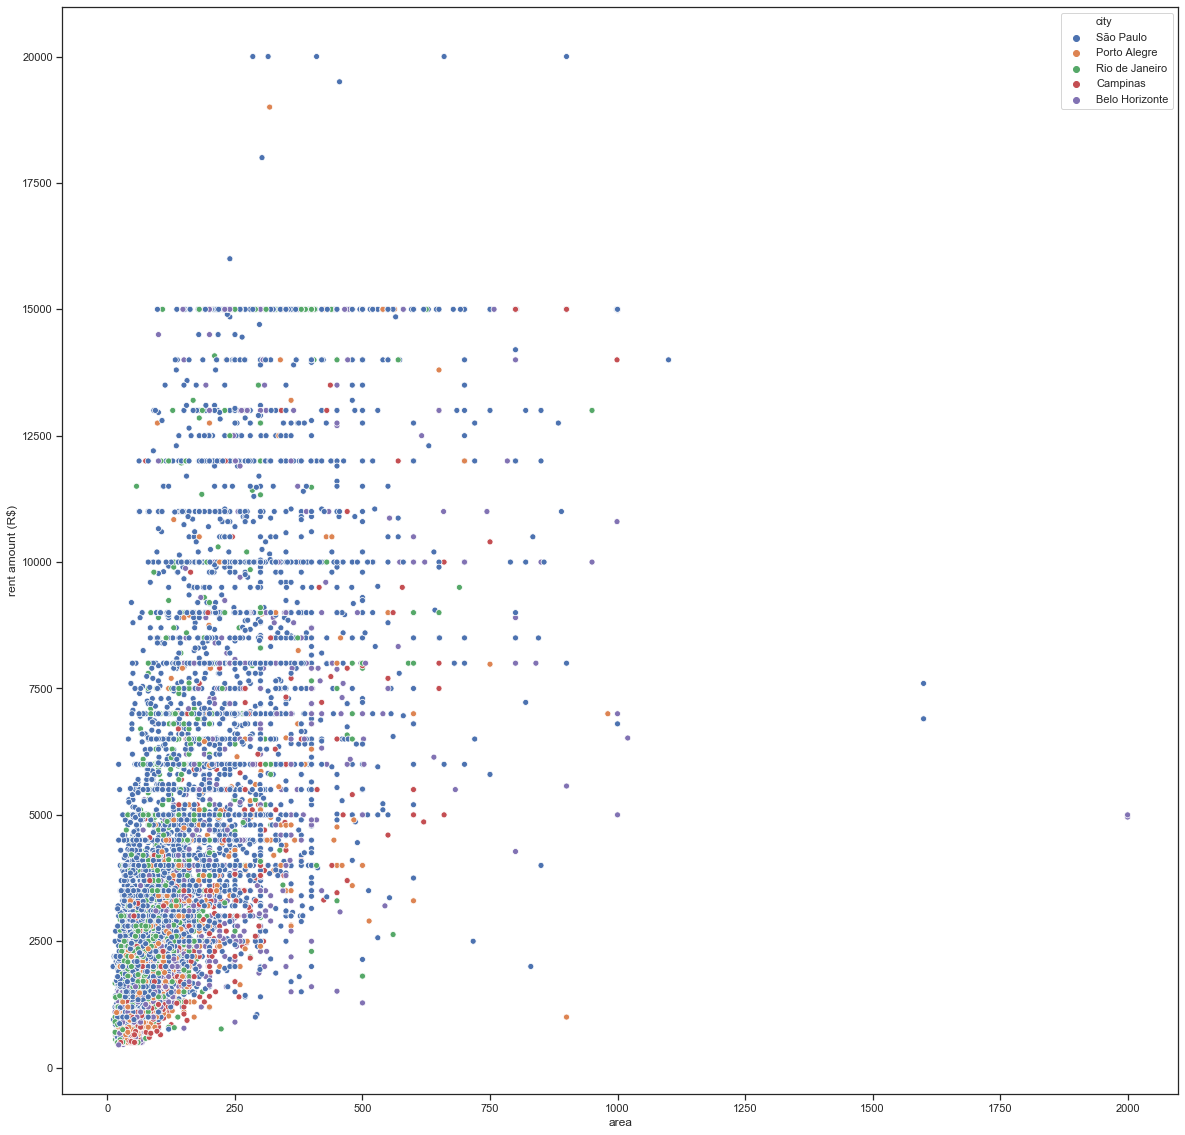

In [14]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.scatterplot(ax=ax, x='area', y='rent amount (R$)', data=big_area, hue='city')
# Сегментация по городам

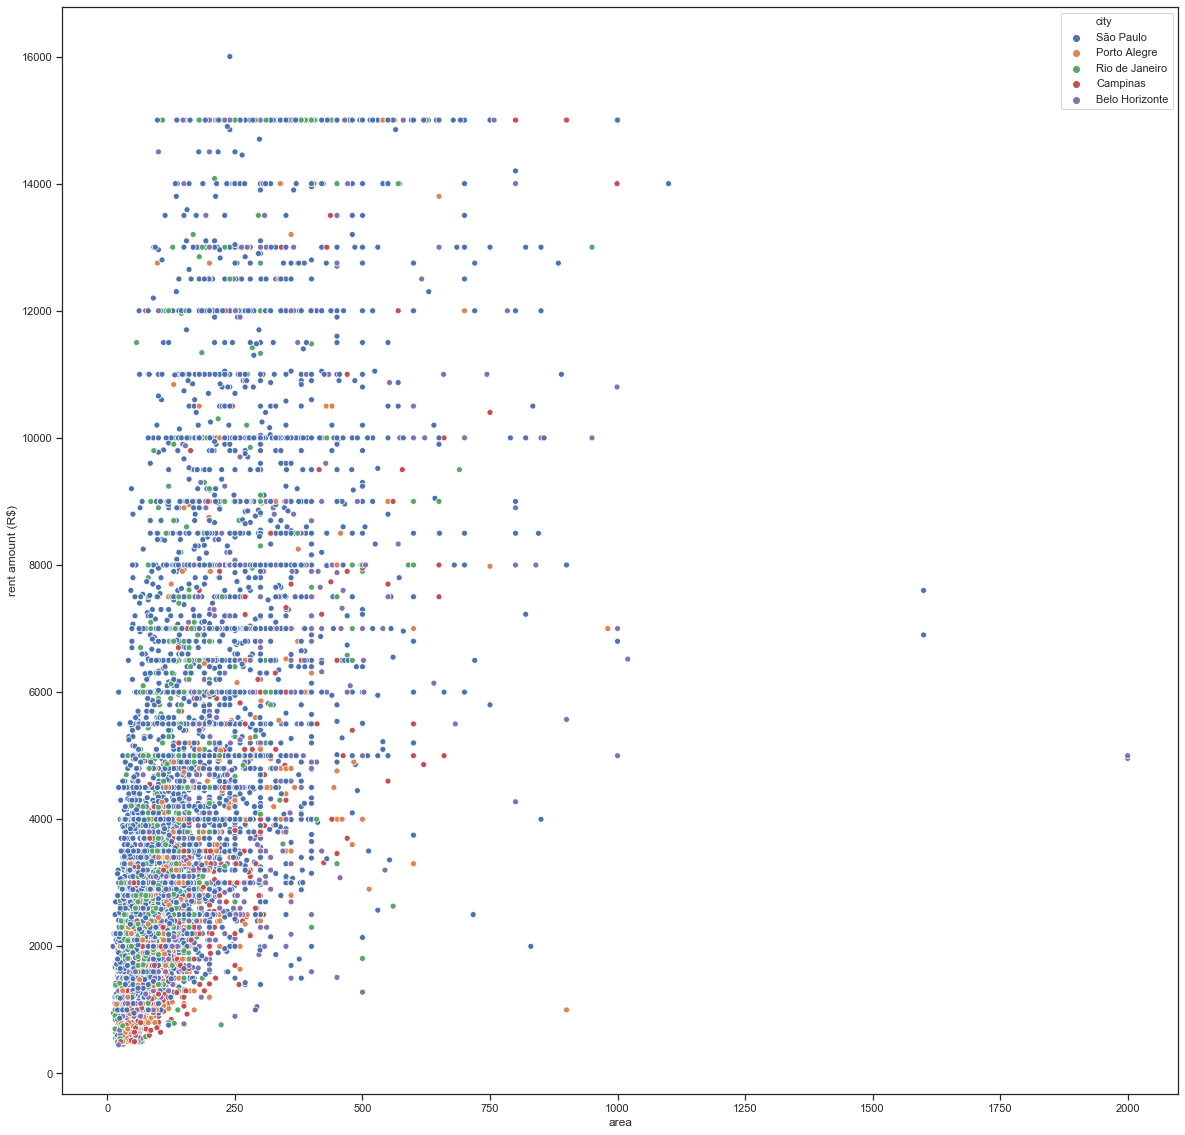

In [15]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.scatterplot(ax=ax, x='area', y='rent amount (R$)', data=big_area1, hue='city')

# Гистограмма

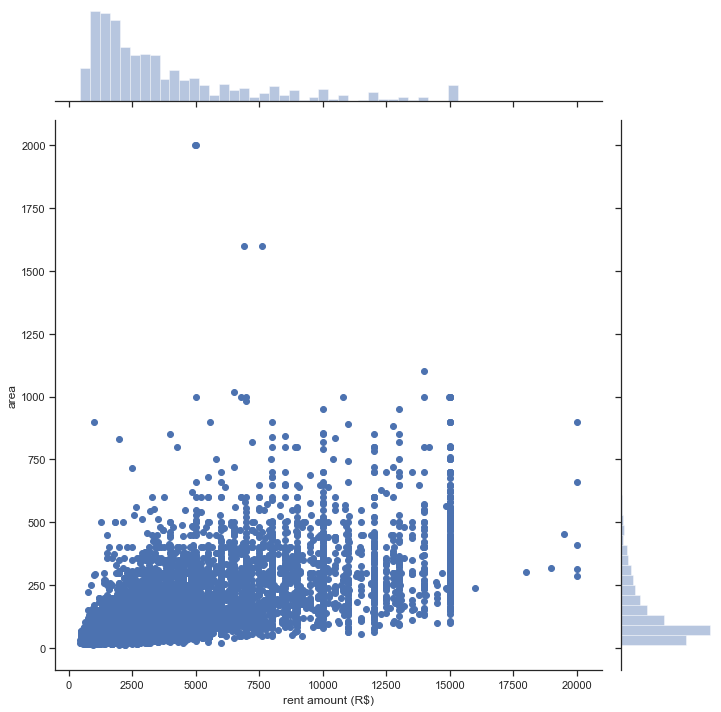

In [17]:
sns.jointplot(x='rent amount (R$)', y='area', data=big_area, height=10)

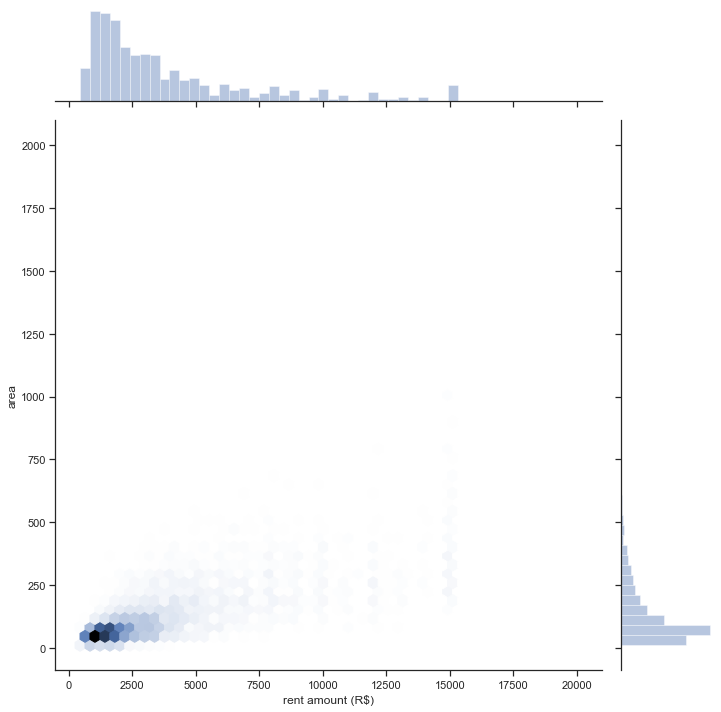

In [86]:
sns.jointplot(x='rent amount (R$)', y='area', data=big_area, kind="hex", height=10)

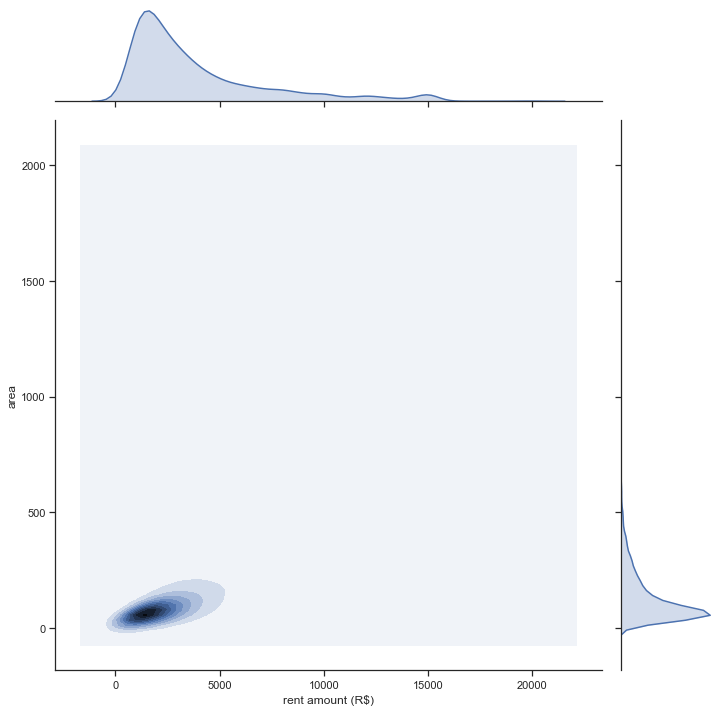

In [90]:
sns.jointplot(x='rent amount (R$)', y='area', data=big_area, kind="kde", height=10)

Парные Диаграммы

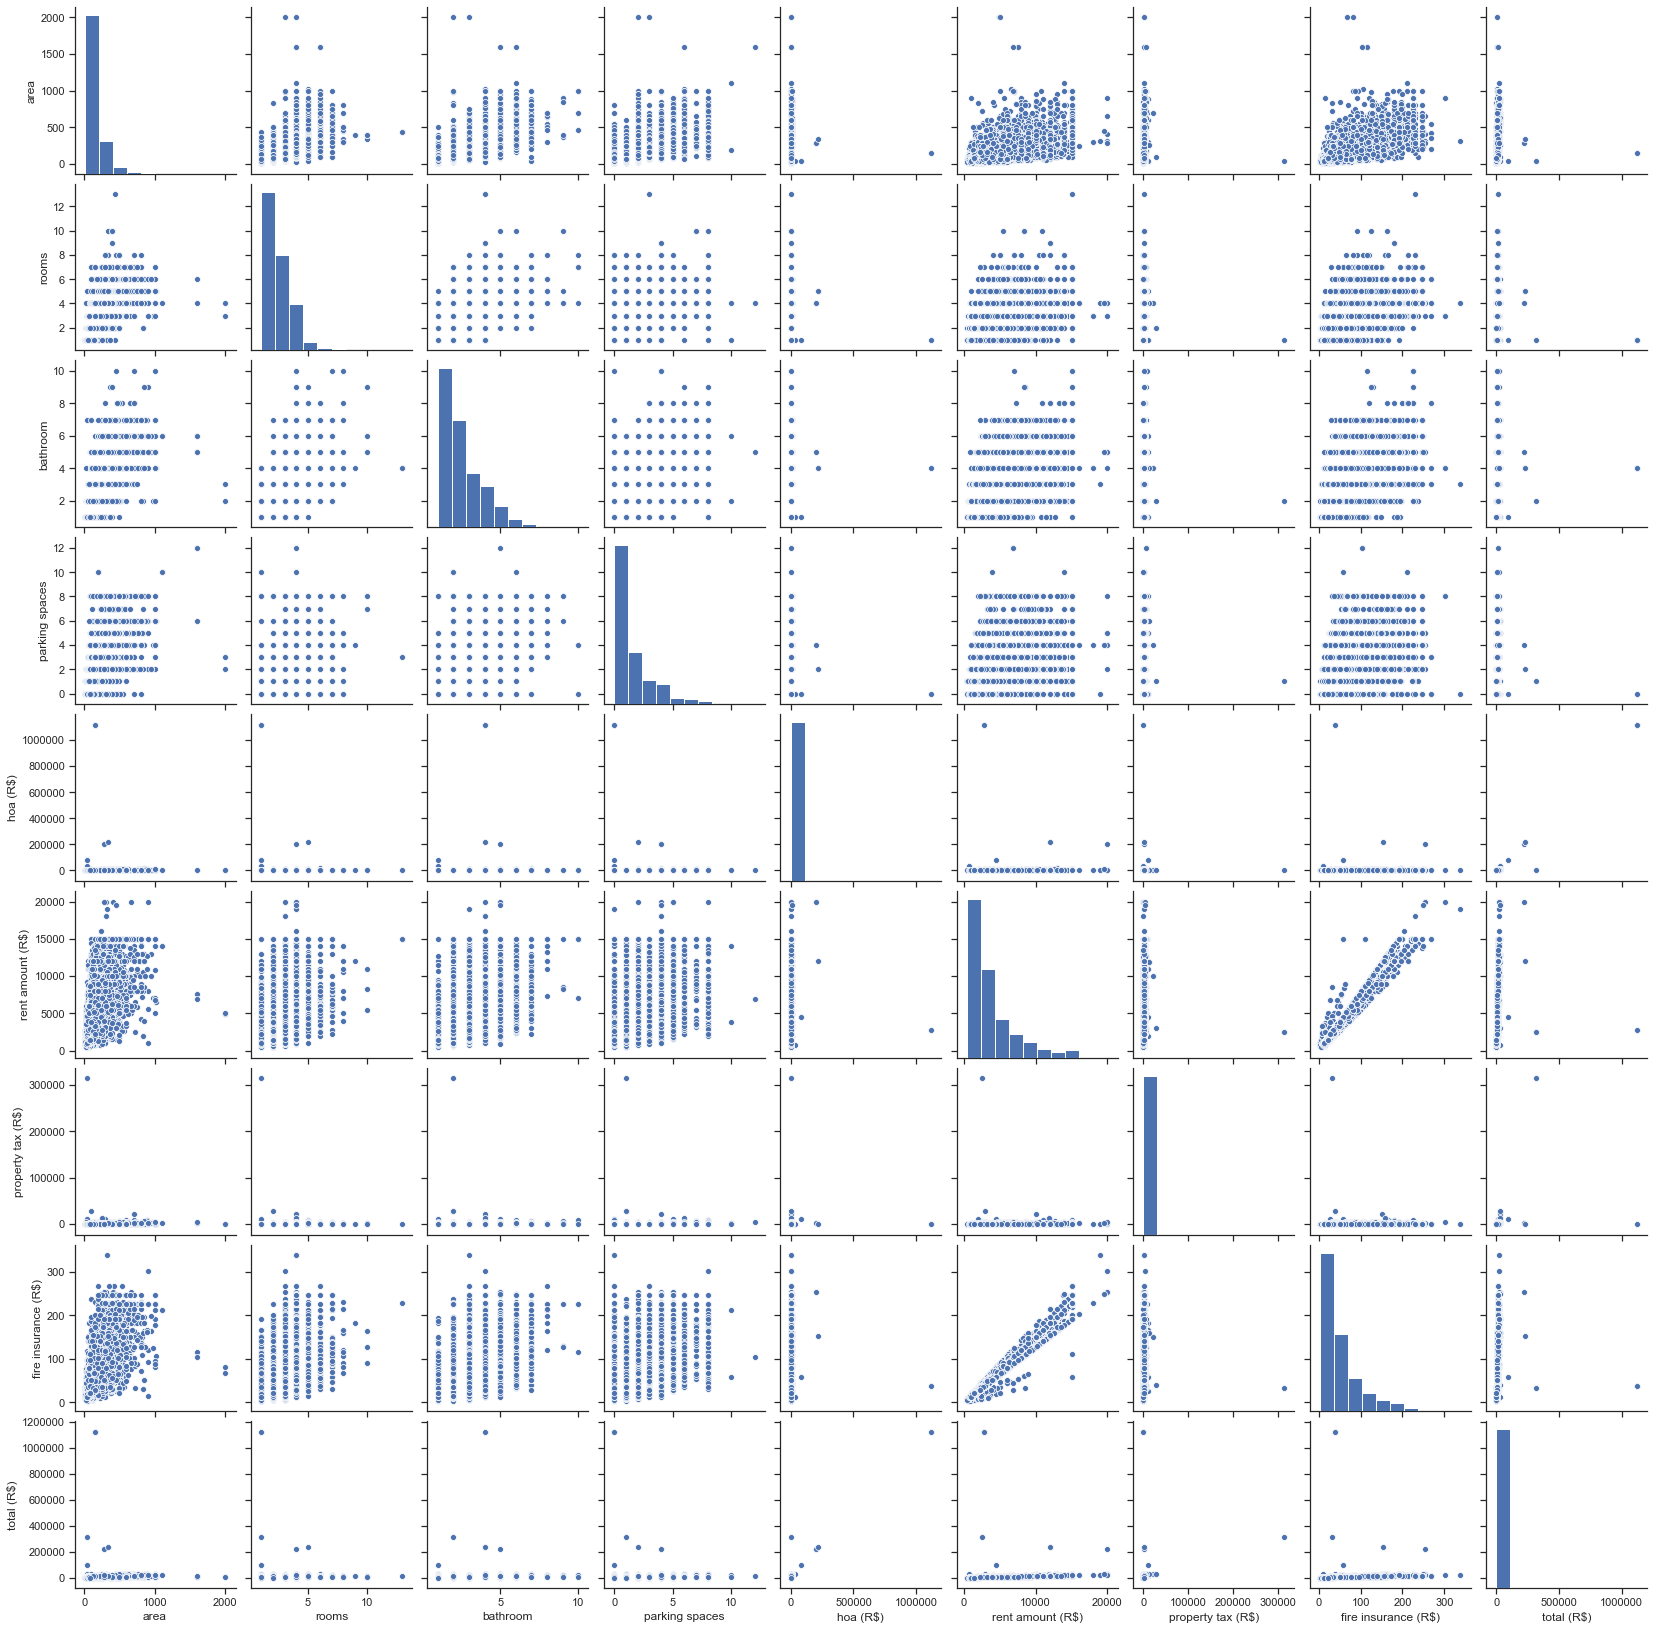

In [91]:
sns.pairplot(big_area)

In [ ]:
sns.pairplot(big_area, hue="city")

Ящик с усами

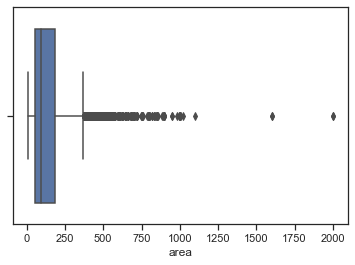

In [17]:
sns.boxplot(x=big_area['area'])

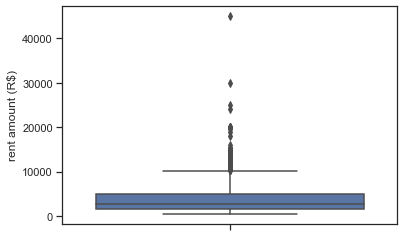

In [20]:
sns.boxplot(y=data['rent amount (R$)'])

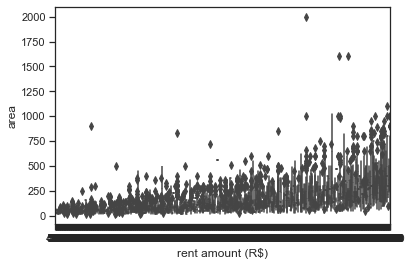

In [24]:
sns.boxplot(x='rent amount (R$)', y='area', data=big_area1)

Какие графики Вы построили и почему?
Я построил диаграммы рассивания на основании двух параметров, площади и стоимости аренды. Предварительно исклчил из основной выборки недвижимость с максимальными значениями для исследования основной массы, а не еденичных едениц недвижимости. На диаграммах видно как относится ценовая категория с площадью недвижимости. Так же я построил диаграмму рассеивания, с дополнительным параметром, отображением комнат. На диаграмме видно как кол-во комнат влияет на цену аренды.

Какие выводы о наборе данных Вы можете сделать на основании построенных графиков?
На основании графикомd можно сказать, что самые большие участки находятся в San Paolo. Наиболее дешевая и небольшая по площади недвижимость находится в Porto Alegre и Campinas.

Корреляционный анализ

In [23]:
data.corr()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
area,1.000000,0.193796,0.226766,0.193983,0.006890,0.180742,0.039059,0.188078,0.051799
rooms,0.193796,1.000000,0.733763,0.617510,0.007139,0.541758,0.075252,0.565148,0.134597
bathroom,0.226766,0.733763,1.000000,0.697379,0.050271,0.668504,0.109253,0.676399,0.208339
parking spaces,0.193983,0.617510,0.697379,1.000000,0.009321,0.578361,0.098378,0.597348,0.148684
hoa (R$),0.006890,0.007139,0.050271,0.009321,1.000000,0.036490,0.007627,0.029535,0.955024
rent amount (R$),0.180742,0.541758,0.668504,0.578361,0.036490,1.000000,0.107884,0.987343,0.264490
property tax (R$),0.039059,0.075252,0.109253,0.098378,0.007627,0.107884,1.000000,0.105661,0.218344
fire insurance (R$),0.188078,0.565148,0.676399,0.597348,0.029535,0.987343,0.105661,1.000000,0.254911
total (R$),0.051799,0.134597,0.208339,0.148684,0.955024,0.264490,0.218344,0.254911,1.000000


In [26]:
data.corr(method='pearson')
# Метод Пирсона

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
area,1.000000,0.193796,0.226766,0.193983,0.006890,0.180742,0.039059,0.188078,0.051799
rooms,0.193796,1.000000,0.733763,0.617510,0.007139,0.541758,0.075252,0.565148,0.134597
bathroom,0.226766,0.733763,1.000000,0.697379,0.050271,0.668504,0.109253,0.676399,0.208339
parking spaces,0.193983,0.617510,0.697379,1.000000,0.009321,0.578361,0.098378,0.597348,0.148684
hoa (R$),0.006890,0.007139,0.050271,0.009321,1.000000,0.036490,0.007627,0.029535,0.955024
rent amount (R$),0.180742,0.541758,0.668504,0.578361,0.036490,1.000000,0.107884,0.987343,0.264490
property tax (R$),0.039059,0.075252,0.109253,0.098378,0.007627,0.107884,1.000000,0.105661,0.218344
fire insurance (R$),0.188078,0.565148,0.676399,0.597348,0.029535,0.987343,0.105661,1.000000,0.254911
total (R$),0.051799,0.134597,0.208339,0.148684,0.955024,0.264490,0.218344,0.254911,1.000000


In [27]:
data.corr(method='kendall')
# Метод Кендала

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
area,1.000000,0.715436,0.686648,0.568822,0.210480,0.532851,0.510757,0.551117,0.544737
rooms,0.715436,1.000000,0.682927,0.562424,0.177163,0.465190,0.468680,0.477098,0.481159
bathroom,0.686648,0.682927,1.000000,0.619127,0.252538,0.569937,0.530415,0.576193,0.590431
parking spaces,0.568822,0.562424,0.619127,1.000000,0.205077,0.482536,0.463745,0.487772,0.500842
hoa (R$),0.210480,0.177163,0.252538,0.205077,1.000000,0.283055,0.316656,0.239823,0.426224
rent amount (R$),0.532851,0.465190,0.569937,0.482536,0.283055,1.000000,0.490645,0.937742,0.856535
property tax (R$),0.510757,0.468680,0.530415,0.463745,0.316656,0.490645,1.000000,0.487577,0.560713
fire insurance (R$),0.551117,0.477098,0.576193,0.487772,0.239823,0.937742,0.487577,1.000000,0.807292
total (R$),0.544737,0.481159,0.590431,0.500842,0.426224,0.856535,0.560713,0.807292,1.000000


In [28]:
data.corr(method='spearman')
# Метод Спермана

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
area,1.000000,0.848880,0.827743,0.701161,0.225983,0.728095,0.682270,0.745816,0.742642
rooms,0.848880,1.000000,0.769822,0.646679,0.206182,0.600969,0.595516,0.613788,0.621837
bathroom,0.827743,0.769822,1.000000,0.702826,0.293821,0.715890,0.654556,0.721150,0.740281
parking spaces,0.701161,0.646679,0.702826,1.000000,0.229139,0.620175,0.582921,0.625150,0.641078
hoa (R$),0.225983,0.206182,0.293821,0.229139,1.000000,0.355785,0.392537,0.293228,0.519755
rent amount (R$),0.728095,0.600969,0.715890,0.620175,0.355785,1.000000,0.659230,0.988045,0.968176
property tax (R$),0.682270,0.595516,0.654556,0.582921,0.392537,0.659230,1.000000,0.656049,0.731439
fire insurance (R$),0.745816,0.613788,0.721150,0.625150,0.293228,0.988045,0.656049,1.000000,0.945772
total (R$),0.742642,0.621837,0.740281,0.641078,0.519755,0.968176,0.731439,0.945772,1.000000


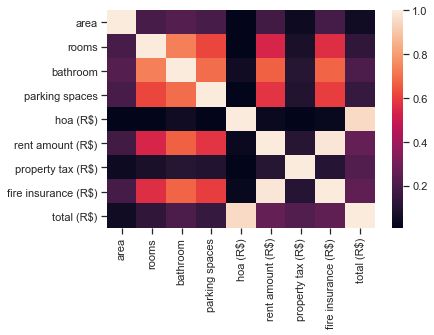

In [29]:
sns.heatmap(data.corr())

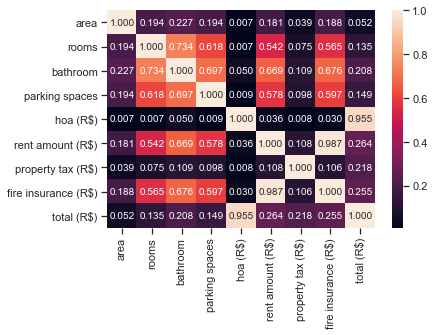

In [30]:
sns.heatmap(data.corr(), annot=True, fmt='.3f')

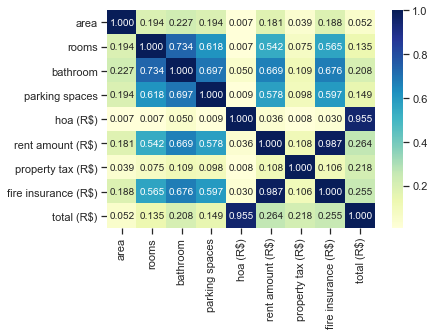

In [31]:
sns.heatmap(data.corr(), annot=True, fmt='.3f', cmap='YlGnBu')

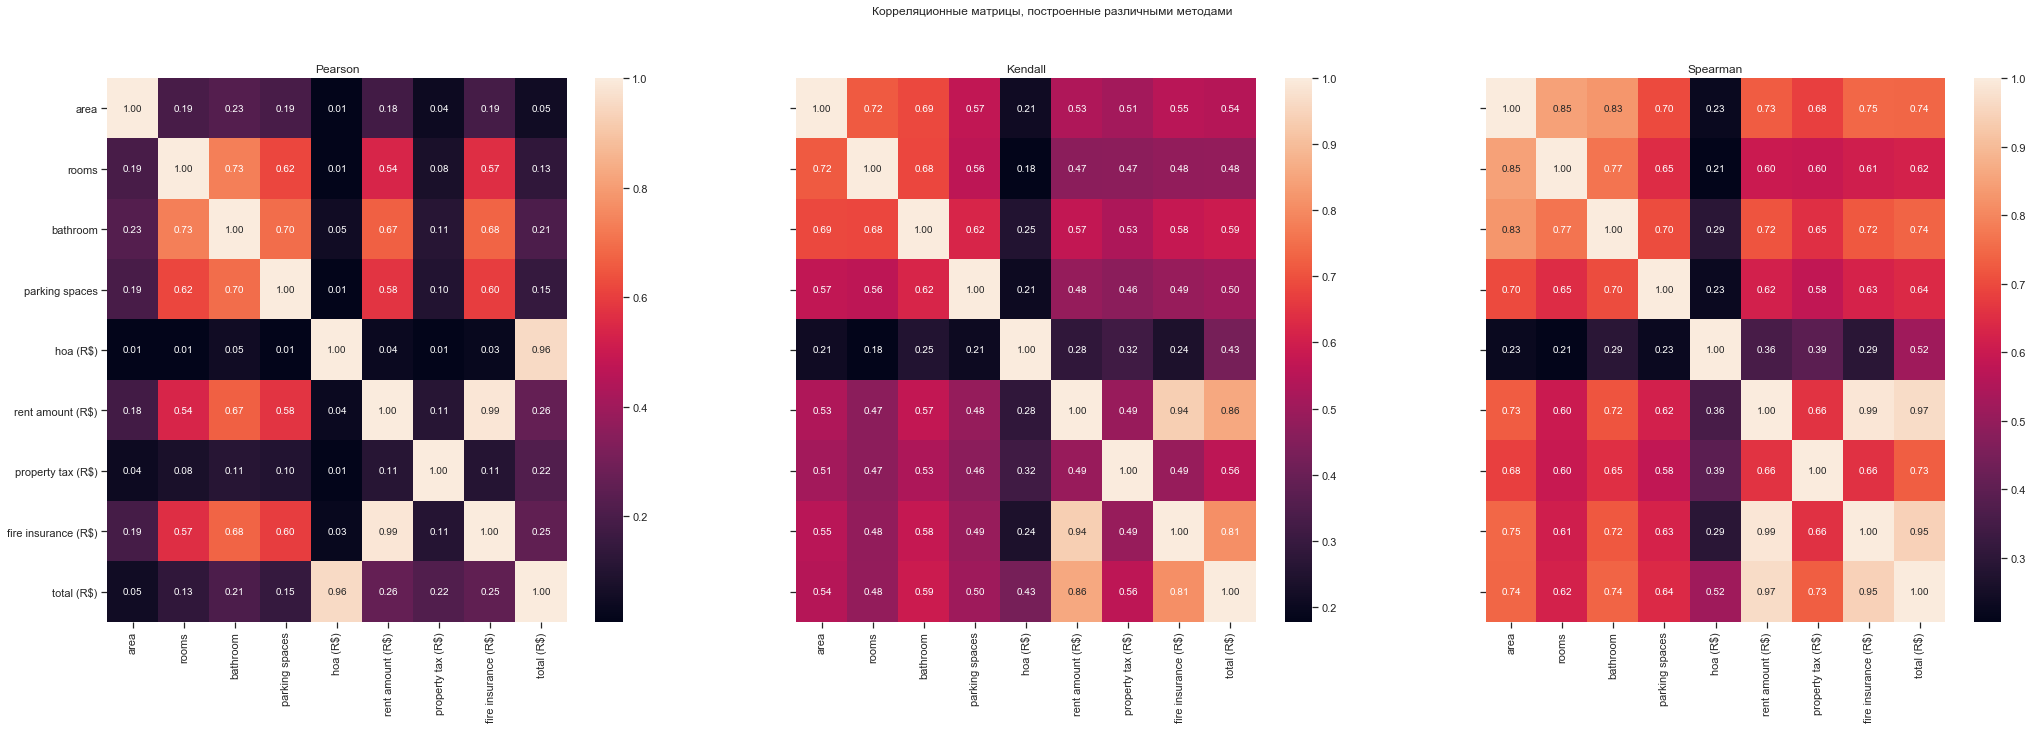

In [32]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(35,10))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')

Из диаграмм видно наиболее коррелирующие значения.